Playing around with COVID data and maps (learning geopandas). Following guide here: https://medium.com/analytics-vidhya/mapping-covid-19-infections-in-toronto-with-python-an-introduction-to-plotting-with-geopandas-9e7a3b721c39

Then adapt to other datasets


Downloaded covid data from here: https://public.tableau.com/app/profile/tphseu/viz/COVID-19-PublicFacingMap/MapDashboard

In [31]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
sns.set(font_scale=1.5)

# 1. Load your data
path0 = r'C:\Users\Ksenia\OneDrive\Desktop'
file_name1 = 'casecounts2.csv'
file_path = os.path.join(path0, file_name1)

# Check if the file exists
if os.path.exists(file_path):
    # Read the CSV file using pandas
    covid_counts = pd.read_csv(file_path,  quotechar='"', encoding='utf-8')
else:
    print(f"File '{file_name}' not found in the specified directory.")

In [32]:

covid_counts.head()

,Neighbourhood ID,Neighbourhood Name,"Rate per 100,000 people",Case Count
0,1.0,West Humber-Clairville,16672.67051,5554
1,2.0,Mount Olive-Silverstone-Jamestown,16243.85507,5353
2,3.0,Thistletown-Beaumond Heights,17364.86486,1799
3,4.0,Rexdale-Kipling,13011.68202,1370
4,5.0,Elms-Old Rexdale,14445.85448,1366


In [33]:
# The covid data contains a record of counts for missing addresses/postal codes
# displays 10 entries, sorted by case count (some NANs)
covid_counts.sort_values(by='Case Count', ascending=False).head(10)

,Neighbourhood ID,Neighbourhood Name,"Rate per 100,000 people",Case Count
136,137.0,Woburn,12317.472190,6588
25,26.0,Downsview-Roding-CFB,17950.473580,6292
76,77.0,Waterfront Communities-The Island,9456.404655,6233
140,NaN,Missing Address/Postal Code,NaN,6025
131,132.0,Malvern,12857.925740,5631
130,131.0,Rouge,12022.539570,5590
0,1.0,West Humber-Clairville,16672.670510,5554
1,2.0,Mount Olive-Silverstone-Jamestown,16243.855070,5353
24,25.0,Glenfield-Jane Heights,15657.079140,4774
26,27.0,York University Heights,16203.384920,4471


Load toronto map data:

In [34]:
#same thing for the shp file for the map:
path1 = r'C:\Users\Ksenia\OneDrive\Desktop\toronto-open-data-portal\toronto-nbrhoods-wgs84'
file_name2 = 'Neighbourhoods - 4326.shp'
file_path2 = os.path.join(path1, file_name2)

In [35]:
# Read the shapefile
nbrhood_geo_data = gpd.read_file(file_path2) #this reads in the file (need all the other file extensions in same folder as .shp file)

# Read the CSV file with data field labels
file_name3 = 'Neighbourhoods fields.csv' 
file_path3 = os.path.join(path1, file_name3)
nbrhood_geo_cols = pd.read_csv(file_path3, quotechar='"', encoding='utf-8')

print(nbrhood_geo_data.crs)   


EPSG:4326


Ok this got confusing since I'm new to working with geospatial data. With some digging, found that these acronyms mean:

EPSG (European Petroleum Survey Group) and WGS (World Geodetic System) are related but distinct concepts used in geospatial data


EPSG is a dataset maintained by the International Association of Oil and Gas Producers (IOGP), formerly known as the European Petroleum Survey Group.
It defines a standardized set of coordinate reference systems (CRS), transformations, and other spatial parameters.
Each CRS is identified by a unique number called an EPSG code (e.g., EPSG:43
WGS:

WGS refers to the World Geodetic System, which is a standard for mapping and positioning on the Earth's surface.
WGS 84 (World Geodetic System 1984) is the most commonly used version. It defines a global reference system with a specific ellipsoid, datum, and coordinate system.
The coordinates in WGS 84 are expressed in latitude and longitude, where the equator is at 0 degrees latitude and the prime meridian is at 0 degrees l
ongitude.

In [36]:
nbrhood_geo_data.crs = 'EPSG:4326'

# Reproject to a different CRS
nbrhood_geo_data = nbrhood_geo_data.to_crs('EPSG:3161') 

#this works, original code used an depreciated method of doing this 

In [37]:
nbrhood_geo_data.rename(columns=dict(zip(nbrhood_geo_cols.field, nbrhood_geo_cols.name)), inplace=True)
nbrhood_geo_data.head(3)

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,CLASSIFICATION,CLASSIFICATION_CODE,OBJECTID,geometry
0,1,2502366,26022881,0,174,174,South Eglinton-Davisville,South Eglinton-Davisville (174),Not an NIA or Emerging Neighbourhood,NA,17824737.0,"POLYGON ((1382638.832 11914785.471, 1382651.33..."
1,2,2502365,26022880,0,173,173,North Toronto,North Toronto (173),Not an NIA or Emerging Neighbourhood,NA,17824753.0,"POLYGON ((1381671.908 11915728.695, 1381598.70..."
2,3,2502364,26022879,0,172,172,Dovercourt Village,Dovercourt Village (172),Not an NIA or Emerging Neighbourhood,NA,17824769.0,"POLYGON ((1379102.021 11910320.788, 1379003.25..."


In [38]:
# remove the area code and trailing whitespace from the area names
nbrhood_geo_data['AREA_NAME'] = nbrhood_geo_data.AREA_NAME.str.replace(r'\s\(\d+\)', '') #changed this to raw string to avoid errors


In [43]:
set(nbrhood_geo_data.AREA_NAME).difference(set(covid_counts['Neighbourhood Name']))

{'Avondale',
 'Bay-Cloverhill',
 'Bendale South',
 'Bendale-Glen Andrew',
 'Cabbagetown-South St.James Town',
 'Church-Wellesley',
 'Dovercourt Village',
 'Downsview',
 'Downtown Yonge East',
 "East L'Amoreaux",
 'East Willowdale',
 'Etobicoke City Centre',
 'Fenside-Parkwoods',
 'Fort York-Liberty Village',
 'Golfdale-Cedarbrae-Woburn',
 'Harbourfront-CityPlace',
 'Humber Bay Shores',
 'Islington',
 'Junction-Wallace Emerson',
 "L'Amoreaux West",
 'Malvern East',
 'Malvern West',
 'Mimico-Queensway',
 'Morningside Heights',
 'North St.James Town',
 'North Toronto',
 'Oakdale-Beverley Heights',
 "Parkwoods-O'Connor Hills",
 'South Eglinton-Davisville',
 'St Lawrence-East Bayfront-The Islands',
 'Wellington Place',
 'West Queen West',
 'West Rouge',
 'Woburn North',
 'Yonge-Bay Corridor',
 'Yonge-Doris'}

This is way more than the original project so let's try to figure it out.... need index of each of these which has a different name. For now, just follow the walkthrough and see if I can get it to work 

In [44]:
# covid_counts.sort_values(by= 'Neighbourhood Name').head(300)
# renaming the neighbourhood names in the covid data to the Toronto shapefile conventions
covid_counts.loc[19, 'Neighbourhood Name'] = 'Cabbagetown-South St.James Town'
covid_counts.loc[89, 'Neighbourhood Name'] = 'North St.James Town'
covid_counts.loc[127, 'Neighbourhood Name'] = 'Weston-Pellam Park'

In [45]:
covid_counts.rename(columns={'Neighbourhood Name':'AREA_NAME'}, inplace=True)

In [46]:
covid_counts.set_index('AREA_NAME', inplace=True)
nbrhood_geo_data.set_index('AREA_NAME', inplace=True)

In [47]:
nbrhood_centroids = gpd.GeoDataFrame(nbrhood_geo_data.centroid, columns=['geometry'])
nbrhood_centroids = nbrhood_centroids.join(covid_counts)

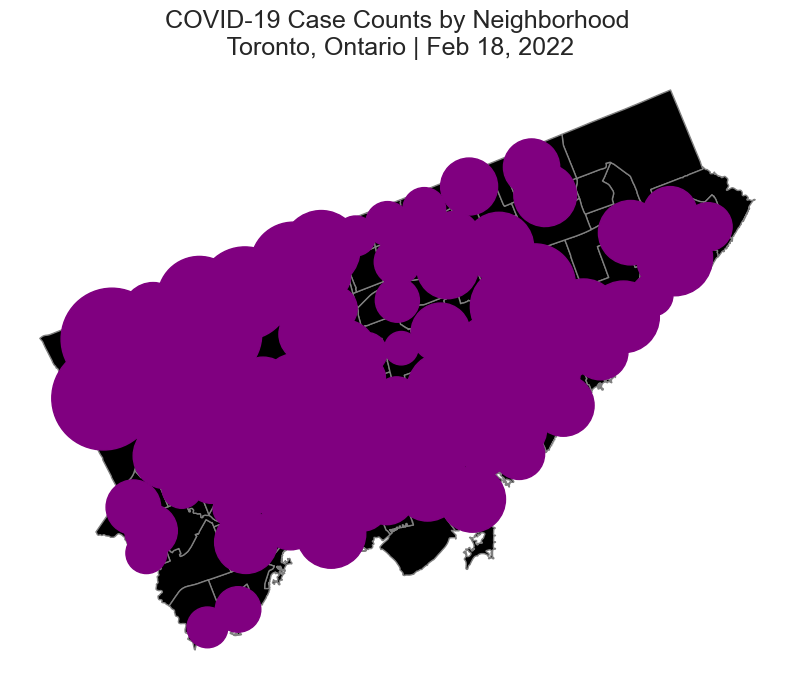

In [56]:
fig, ax = plt.subplots(figsize=(10,8))

# base map
nbrhood_geo_data.plot(ax=ax, facecolor='black', edgecolor='gray')

# symbols layer
ms = nbrhood_centroids['Case Count']
nbrhood_centroids.plot(ax=ax, markersize=ms, color='purple', legend=True)
ax.set_title('COVID-19 Case Counts by Neighborhood\n Toronto, Ontario | Feb 18, 2022')
ax.axis('equal')
ax.set_axis_off()
plt.show();

In [52]:
# subsetting the data in two layers: 5 highest case counts & everyone else
nbrhood_centroids.sort_values(by='Case Count', ascending=False, inplace=True)

highest_counts = nbrhood_centroids.head(5)
lower_counts = nbrhood_centroids.iloc[5:]

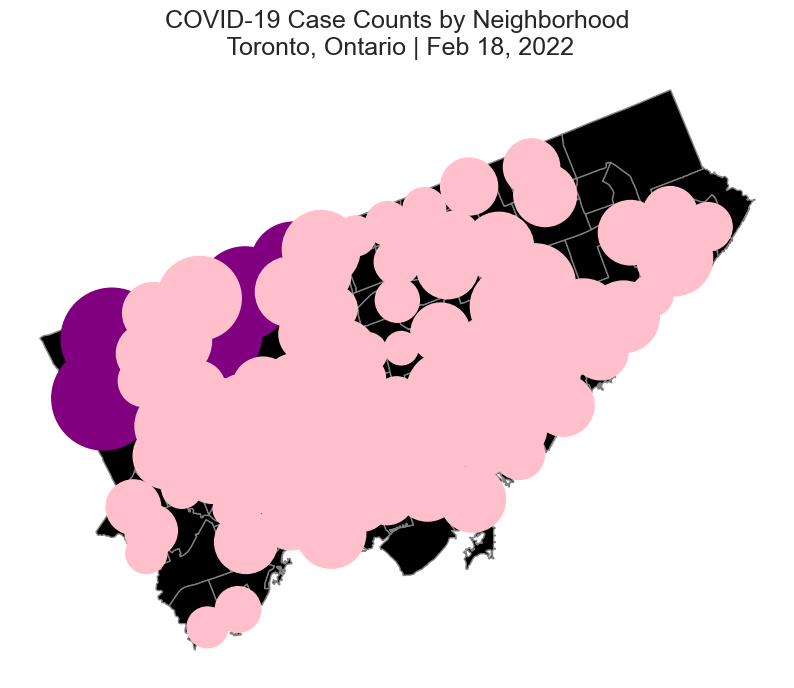

In [67]:
fig, ax = plt.subplots(figsize=(10,8))

# base map
nbrhood_geo_data.plot(ax=ax, facecolor='black', edgecolor='gray')

# symbols layer
ms1 = highest_counts['Case Count']
ms2 = lower_counts['Case Count']

highest_counts.plot(ax=ax, markersize=ms1, color='purple', legend=True)
lower_counts.plot(ax=ax, markersize=ms2, color='pink')
ax.set_title('COVID-19 Case Counts by Neighborhood\n Toronto, Ontario | Feb 18, 2022')
ax.axis('equal')
ax.set_axis_off()
plt.show();

In [54]:
# joining the covid case count/rate data into the original geopandas frame
nbrhood_geo_data = nbrhood_geo_data.join(covid_counts)

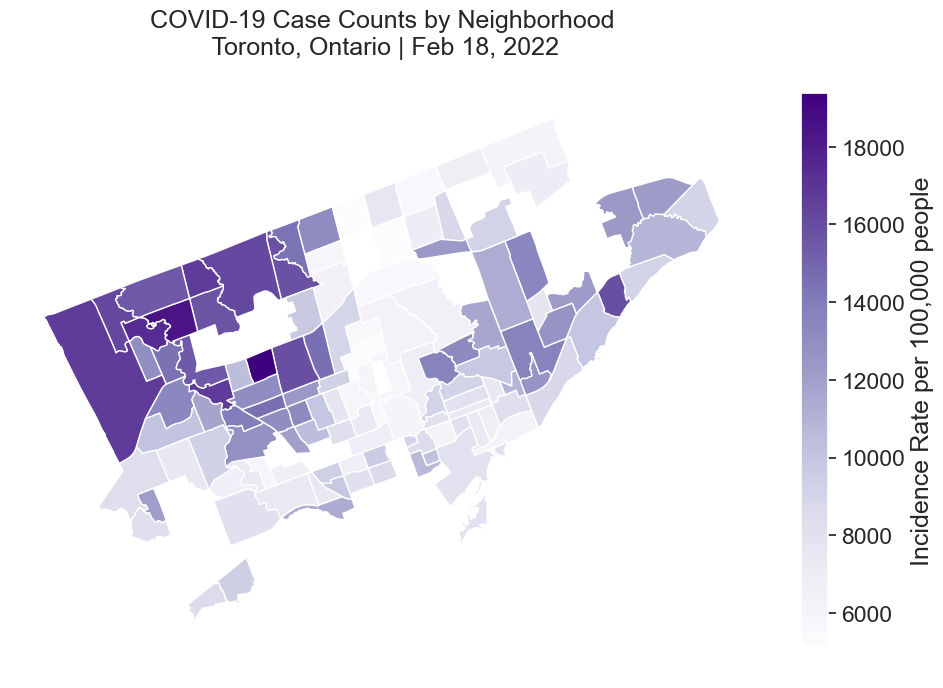

In [60]:
fig, ax = plt.subplots(figsize=(12,8))

nbrhood_geo_data.plot(ax=ax,
                     column='Rate per 100,000 people',
                     cmap='Purples',
                     legend=True,
                     legend_kwds={'label':'Incidence Rate per 100,000 people',
                                  'orientation': 'vertical',
                                  'shrink': 0.9})

ax.set_title('COVID-19 Case Counts by Neighborhood\n Toronto, Ontario | Feb 18, 2022')
ax.axis('equal')
ax.set_axis_off()
plt.show();